In [3]:
!pip install -r requirements.txt

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fqdn-1.5.1-py3-none-any.whl.metadata (1.4 kB)
  Using cached isoduration-20.11.0-py3-none-any.whl.metadata (5.7 kB)
  Using cached jsonpointer-3.0.0-py2.py3-none-any.whl.metadata (2.3 kB)
  Using cached uri_template-1.3.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached arrow-1.3.0-py3-none-any.whl.metadata (7.5 kB)
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.6 MB 1.9 MB/s eta 0:00:06
   ----- ---------------------------------- 1.6/11.6 MB 2.6 MB/s eta 0:00:04
   ------- -------------------------------- 2.1/11.6 MB 2.9 MB/s eta 0:00:04
   --------- ------------------------------ 2.9/11.6 MB 2.9 MB/s eta 0:00:03
   ------------ --------------------------- 3.7/11.6 MB 3.1 MB/s eta 0:00:03
   --------------- ------------------------ 4.5/11.6 MB 3.3 MB/s eta 0:00:03


In [1]:
import requests
import joblib
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from pandas import option_context
from tqdm import tqdm
from statsmodels.stats.inter_rater import aggregate_raters
from sklearn.metrics import cohen_kappa_score
from scipy.stats import mannwhitneyu,shapiro,ttest_ind

import cliffsDelta as cd
import GenerateActivities as gat
import important_features as imf

In [ ]:
QUERY_ROOT = "https://api.github.com"
TOKEN = '' # write your GitHub API key here
HEADERS={'Authorization':'token '+TOKEN}

## Section 3

### Question 1

#### Write an automated Python script to identify all GitHub bot actors in the list of contributors, by querying the GitHub REST API users endpoint and extracting the required information to make this decision. 

#### More information: You can search for the "type" key in the obtianed JSON result, If it is "Bot", then it is a bot actor, if it is "User", then it is an account.

In [4]:
# 1. Read the given <sample>.csv file into a pandas DataFrame (df).
# 2. Make sure there are 2 columns, one column name is "contributor" that has the name of the contributor, 
#    and another column name is "bothunter_type" that you will use later on in this assignment.
# 3. Display the DataFrame.

# YOUR CODE BELOW

df = pd.read_csv("Contributors/sample23.csv")

print(df.columns)

print(df)

Index(['contributor', 'bothunter_type'], dtype='object')
                      contributor bothunter_type
0                    Coderambling          Human
1                         Intron7          Human
2                      ParsifalXu          Human
3                 StefanKarpinski          Human
4                      adamltyson          Human
5                      anutosh491          Human
6                       benrutter          Human
7                         cat-bro          Human
8                    codecov[bot]            Bot
9                codspeed-hq[bot]            Bot
10                       commit-0          Human
11                      coveralls            Bot
12                       datejada          Human
13                   editorialbot          Human
14                     emmanuelle          Human
15                          giovp          Human
16            github-actions[bot]            Bot
17  github-advanced-security[bot]            Bot
18          

In [5]:
# 1. Store the names of the contributors in a list
# 2. print the list

# YOUR CODE BELOW

contributors = df["contributor"].tolist()

print(contributors)

['Coderambling', 'Intron7', 'ParsifalXu', 'StefanKarpinski', 'adamltyson', 'anutosh491', 'benrutter', 'cat-bro', 'codecov[bot]', 'codspeed-hq[bot]', 'commit-0', 'coveralls', 'datejada', 'editorialbot', 'emmanuelle', 'giovp', 'github-actions[bot]', 'github-advanced-security[bot]', 'hvwaldow', 'imagesc-bot', 'jennaswa', 'jsspencer', 'kp992', 'lucyleeow', 'maxnoe', 'meeseeksmachine', 'mosc9575', 'nanosoldier', 'netlify[bot]', 'norlandrhagen', 'pangeo-bot', 'pdebuyl', 'petscbot', 'pre-commit-ci[bot]', 'rcurtin', 'renovate[bot]', 'scottyhq', 'takagi', 'ufechner7', 'yuanx749']


In [6]:
# 1. Using a for loop, iterate over each contributor in the list and query the GitHub Users API.
#    You can use "query = f'{QUERY_ROOT}/users/{contributor}'", where QUERY_ROOT is defined at the beginning of this notebook 
#    and 'contributor' is each individual contributor from the list
# 2. Get the response using 'response = requests.get(query, headers=HEADERS)'.
# 3. convert the response to JSON using 'json_response = response.json()'.
# 4. Iterate over each JSON response and get the value of the 'type' key. If it is "Bot" then the contributor is a bot actor, 
#    if "User" then the contributor is an account. You should boolean values to indicate if the contributor is a bot actor (True) or User/Organisation (False)
# 5. Save these results in list of dictionary of the form [{'contributor': <contributor name>, 'app': <boolean value>}, {...}, {...}, {...}].
#    Lets call this list as "app_dict"
# 6. Finally convert this list of dictionary to DataFrame by writing 'pd.DataFrame.from_dict(app_dict)'
# 7. Display the DataFrame. This should have two columns - contributor and app


# YOUR CODE BELOW

app_dict = []

for contributor in contributors:
    query = f"{QUERY_ROOT}/users/{contributor}"
    
    response = requests.get(query, headers=HEADERS)
    json_response = response.json()
        
    is_bot = json_response.get("type") == "Bot"
        
    app_dict.append({"contributor": contributor, "app": is_bot})

app_df = pd.DataFrame.from_dict(app_dict)

print(app_df)

                      contributor    app
0                    Coderambling  False
1                         Intron7  False
2                      ParsifalXu  False
3                 StefanKarpinski  False
4                      adamltyson  False
5                      anutosh491  False
6                       benrutter  False
7                         cat-bro  False
8                    codecov[bot]   True
9                codspeed-hq[bot]   True
10                       commit-0  False
11                      coveralls  False
12                       datejada  False
13                   editorialbot  False
14                     emmanuelle  False
15                          giovp  False
16            github-actions[bot]   True
17  github-advanced-security[bot]   True
18                       hvwaldow  False
19                    imagesc-bot  False
20                       jennaswa  False
21                      jsspencer  False
22                          kp992  False
23              

### Question 2

#### Add a new 'actor' column in the CSV file to store this information. You can write True if it is a bot actor and False if it is not.

#### Report on the total number of GitHub bot actors, and User accounts present in the list of accounts of your dataset.

In [7]:
# Merge the app DataFrame to df by writing 'pd.merge(df, <app df>, on='contributor'). This is similar to SQL join on primary key 'contributor'.
# The resultant df should have 3 columns - contributor, bothunter_type and user_type.

# YOUR CODE BELOW

merged_data = pd.merge(df, app_df, on='contributor')
merged_data = merged_data.rename(columns={'app': 'user_type'})
print(merged_data)

num_bots = sum(merged_data["user_type"])
num_users = len(merged_data) - num_bots

print(f"Total GitHub Bot Actors: {num_bots}")
print(f"Total GitHub User Accounts: {num_users}")


                      contributor bothunter_type  user_type
0                    Coderambling          Human      False
1                         Intron7          Human      False
2                      ParsifalXu          Human      False
3                 StefanKarpinski          Human      False
4                      adamltyson          Human      False
5                      anutosh491          Human      False
6                       benrutter          Human      False
7                         cat-bro          Human      False
8                    codecov[bot]            Bot       True
9                codspeed-hq[bot]            Bot       True
10                       commit-0          Human      False
11                      coveralls            Bot      False
12                       datejada          Human      False
13                   editorialbot          Human      False
14                     emmanuelle          Human      False
15                          giovp       

### Question 3

#### For each bot actor, write their purpose, the task that they automate by looking at their GitHub profile, homepage, information on the GitHub Marketplace, or other documentation that you can find online.


In [9]:
bot_actors = merged_data.loc[merged_data["user_type"] == True, "contributor"].tolist()
print(bot_actors)

# Here the task of each bot actor
bot_actors_tasks = [
  {
    "bot_name": "Codecov[bot]",
    "purpose": "Code coverage analysis",
    "tasks": "Analyzes test results to measure code coverage and comments on PRs with detailed reports."
  },
  {
    "bot_name": "Codspeed-hq[bot]",
    "purpose": "Code performance optimization",
    "tasks": "Runs benchmarks to analyze and improve the performance of projects."
  },
  {
    "bot_name": "GitHub-Actions[bot]",
    "purpose": "Automating CI/CD workflows",
    "tasks": "Executes scripts to test, build, and deploy code automatically."
  },
  {
    "bot_name": "GitHub-Advanced-Security[bot]",
    "purpose": "Security and vulnerability analysis",
    "tasks": "Scans dependencies and code for potential security vulnerabilities."
  },
  {
    "bot_name": "Netlify[bot]",
    "purpose": "Automated website deployment",
    "tasks": "Deploys web applications and static sites on Netlify after each commit."
  },
  {
    "bot_name": "Pre-commit-ci[bot]",
    "purpose": "Code quality assurance",
    "tasks": "Runs pre-commit hooks (formatting, linting, testing) to ensure code quality."
  },
  {
    "bot_name": "Renovate[bot]",
    "purpose": "Dependency management automation",
    "tasks": "Automatically updates project dependencies through pull requests."
  }
]


['codecov[bot]', 'codspeed-hq[bot]', 'github-actions[bot]', 'github-advanced-security[bot]', 'netlify[bot]', 'pre-commit-ci[bot]', 'renovate[bot]']


## Section 4

### Question 1

#### Write an automated script to use BIMBAS (Bot Identification Model Based on Activity Sequences) to obtain a prediction of the GitHub contributor type (Bot or Human) for the contributors present in your dataset.

#### Folow the steps given in each cell to use BIMBAS and obtain predictions.

### Read all the events and select the events performed by the contributors present in the given set

In [10]:
# 1. Read the csv file of events (all_events.csv) provided along with this notebook
# 2. Convert created_at column to datetime format 
#    One possible way is to use lambda function: "events.assign(created_at=lambda d: pd.to_datetime(d.created_at, unit='ms'))"
# 3. Get the contributors provided to you in a list or use the contributors list that you created in Section 3 Question 1. 
#    e.g., ['contributor1', 'contributor2', 'contributor3',...]
# 4. Select the events performed by these contributors alone. Do not consider all the events. You should consider only the events
#    performed by the contributors provided to you. Hint: you can use the df.query function
# 5. Display the considered events.

# YOUR CODE BELOW


events_df = pd.read_csv("all_events.csv")

events_df = events_df.assign(created_at=lambda d: pd.to_datetime(d.created_at, unit="ms"))

filtered_events = events_df.query("login in @contributors")

print(filtered_events)


        Unnamed: 0     event_id          event_type                login  \
3                3  39747379822   IssueCommentEvent         codecov[bot]   
6                6  39747396929  CommitCommentEvent  github-actions[bot]   
15              15  39747413489  CommitCommentEvent  github-actions[bot]   
16              16  39747416135           PushEvent  github-actions[bot]   
21              21  39747427332         CreateEvent  github-actions[bot]   
...            ...          ...                 ...                  ...   
358397      358397  42415358855   IssueCommentEvent     codspeed-hq[bot]   
358398      358398  42415372311   IssueCommentEvent         codecov[bot]   
358401      358401  42415474205           PushEvent  github-actions[bot]   
358403      358403  42415512378           PushEvent  github-actions[bot]   
358428      358428  42415647911           PushEvent   pre-commit-ci[bot]   

                                          repository          created_at  \
3          

### Execute BIMBAS to obtain the predictions

In [11]:
# Do not modify this cell
# Use the following function the code below to obtain your predictions

def execute_bimbas(contributors_list, selected_events):
    '''
    args: contributors_list (list) - list of contributors in the dataset provided to you
          selected_events (DataFrame) - DataFrame of events performed by the considered contributors
    return: bimbas_prediction (DataFrame) - DataFrame of preditions along with the confidence in prediction for each contributor
    '''
    result=pd.DataFrame()
    temp_list = []
    bimbas = joblib.load('bimbas.joblib')
    date_limit = pd.to_datetime(selected_events.created_at.max()) + pd.DateOffset(-90)
    
    for contributor in tqdm(contributors_list):
        # c = contributors[contributor]
        activities = gat.activity_identification(selected_events.query('login==@contributor and created_at>=@date_limit'))
        activity_features = (
                            imf.extract_features(activities)
                            .set_index([[contributor]])
                            )
        # features = pd.concat([features,activity_features])
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=UserWarning)
            probability = bimbas.predict_proba(activity_features)[0][1]
        if(probability <= 0.5):
            contributor_type = 'Human'
        else:
            contributor_type = 'Bot'
        confidence = (abs(probability - 0.5)*2).round(3)
    
        pred = activity_features.set_index([[contributor]]).assign(
            prediction=contributor_type,
            confidence = confidence,
            )
        temp_list.extend([{'contributor':contributor,'bimbas_type':contributor_type,'confidence':confidence}])
    
    bimbas_prediction = pd.DataFrame.from_dict(temp_list)

    return(bimbas_prediction)

In [12]:
# Write your code here to call execute_bimbas function. 
# Pass the contributors list and the filtered events DataFrame as argument to "execute_bimbas" function
# Prediction returned by BIMBAS will have "contributor", "bimbas_type" and "confidence"
# Note: Print the prediction provided by BIMBAS - else this cell will not be graded.

# YOUR CODE BELOW

prediction = execute_bimbas(contributors, filtered_events)
print(prediction)

100%|██████████| 40/40 [00:18<00:00,  2.11it/s]

                      contributor bimbas_type  confidence
0                    Coderambling       Human       0.864
1                         Intron7       Human       0.915
2                      ParsifalXu       Human       0.869
3                 StefanKarpinski       Human       0.885
4                      adamltyson         Bot       0.774
5                      anutosh491       Human       0.938
6                       benrutter       Human       0.893
7                         cat-bro       Human       0.781
8                    codecov[bot]         Bot       0.938
9                codspeed-hq[bot]         Bot       0.916
10                       commit-0         Bot       0.857
11                      coveralls         Bot       0.910
12                       datejada       Human       0.738
13                   editorialbot         Bot       0.471
14                     emmanuelle         Bot       0.938
15                          giovp       Human       0.836
16            

### Create a column in your predictions DataFrame to have predictions provided by BIMBAS. 
### Now your DataFrame should have the following columns - contributor, bothunter_type, app, bimbas_type, confidence 

### Merging bothunter and bimbas predictions

In [13]:
# Merge the predictions provided by BIMBAS to the resultant dataset of Section 3. This final DataFrame should have the following columns - 
# contributor, bothunter_type, user_type, bimbas_type, and confidence.

predictions_df = pd.merge(merged_data, prediction, on='contributor')
predictions_df.head()

,contributor,bothunter_type,user_type,bimbas_type,confidence
0,Coderambling,Human,False,Human,0.864
1,Intron7,Human,False,Human,0.915
2,ParsifalXu,Human,False,Human,0.869
3,StefanKarpinski,Human,False,Human,0.885
4,adamltyson,Human,False,Bot,0.774


### Question 2
#### Using Cohen's Kappa compute and report the interrater agreement score between the labels computed by both the bot identification approaches. Mention your interpretation of Cohen's Kappa

In [ ]:
# Hint: use the cohen_kappa_score library
# YOUR CODE BELOW

kappa_score = cohen_kappa_score(predictions_df["bothunter_type"], predictions_df["bimbas_type"])

print(f"Cohen's Kappa Score: {kappa_score:.3f}")

# Since κ = 0.583, the two bot detection approaches (Bothunter and BIMBAS) have a moderate level of agreement

Cohen's Kappa Score: 0.583


### Question 3
#### Determine the final type of each contributor. Whenever user_type column has the value "User" check if both bimbas_type and bothunter_type give the same prediction, then consider it as your final prediction in "acc_type" column.
#### For the contributors that have different predictions, i.e. bimbas_type is not same as bothunter_type, then make a manual verification and consider that as the type for that contributor. Add an extra column to the DataFrame ﬁle called 'manual' that has the label determined by you. 
#### For manual verification you can make use the GitHub UI and the GitHub API https://api.github.com/users/username

#### Whenever user_type column has the value "Bot", directly write your final acc_type as "Bot Actor"

#### More information:
For each contributor, you can look at their activities in GitHub UI, look at their latest events using GitHub Events API - https://api.github.com/users/<contributor>/events, to make a decision on their type.

In addition, you can also write a very small reason why do you think they are bot or human (e.g., same activity at regular interval so Bot, files committed and code modified looks like Human, comments look like Human, comment look like Bot, test report looks automated so Bot, and so on....). This will be useful to answer your next question.

In [15]:
# Write the code for your manual decision here
# example : 
# manual_list_dict = [{'contributor': '<contributor name>', 'manual': '<your prediction>'}, {....}, {....}, {....}]
# pd.DataFrame.from_dict(manual_list_dict)

# YOUR CODE BELOW

diff_contributors = predictions_df.query("bothunter_type != bimbas_type")["contributor"]
print(diff_contributors)

manual_list_dict = [
    {'contributor' : 'adamltyson', 'manual': 'Human'},
    {'contributor' : 'commit-0', 'manual': 'Bot'},
    {'contributor' : 'editorialbot', 'manual': 'Bot'},
    {'contributor' : 'emmanuelle', 'manual': 'Human'},
    {'contributor' : 'hvwaldow', 'manual': 'Human'},
    {'contributor' : 'imagesc-bot', 'manual': 'Human'},
    {'contributor' : 'nanosoldier', 'manual': 'Bot'},
    {'contributor' : 'pdebuyl', 'manual': 'Human'}
]

manual_df = pd.DataFrame.from_dict(manual_list_dict)

4       adamltyson
10        commit-0
13    editorialbot
14      emmanuelle
18        hvwaldow
19     imagesc-bot
27     nanosoldier
31         pdebuyl
Name: contributor, dtype: object


In [16]:
# Write your code below here to determine the final type of contributor.
# add column named 'acc_type' and write your final decision in it. Final decision is majority of three types - bimbas_type, bothunter_type, manual.

final_type_df = predictions_df.merge(manual_df, on="contributor", how="left")
def determine_final_type(row):
    if row["user_type"] == "Bot":
        return "Bot Actor"
    elif row["bothunter_type"] == row["bimbas_type"]:
        return row["bothunter_type"]
    else:
        return row["manual"]  # Utiliser la décision manuelle en cas de désaccord

final_type_df["acc_type"] = final_type_df.apply(determine_final_type, axis=1)

print(final_type_df)

                      contributor bothunter_type  user_type bimbas_type  \
0                    Coderambling          Human      False       Human   
1                         Intron7          Human      False       Human   
2                      ParsifalXu          Human      False       Human   
3                 StefanKarpinski          Human      False       Human   
4                      adamltyson          Human      False         Bot   
5                      anutosh491          Human      False       Human   
6                       benrutter          Human      False       Human   
7                         cat-bro          Human      False       Human   
8                    codecov[bot]            Bot       True         Bot   
9                codspeed-hq[bot]            Bot       True         Bot   
10                       commit-0          Human      False         Bot   
11                      coveralls            Bot      False         Bot   
12                       

### Question 4
#### Study and report the purpose of these identified bots and humans in the repository assigned to you.
#### For example, the purpose can be based on but not limited to - 
##### 1) the type of activities that they are performing (releasing a version on every Sunday, updating the documentation), 
##### 2) type of comments they are posting (reviewing code, test summary report), 
##### 3) when are they triggered (when a new PR is created, when someone in the project ask the bot to merge the code) and so on.  
#### Note: 
##### The purpose can be other than what is provided in examples above.

## Section 5

### Question 1
#### Use the filtered events file that has the events performed by the contributors provided to you
#### Group each event into the following four categories

Issues: IssueCommentEvent, IssuesEvent  
Pull Requests: PullRequestEvent, PullRequestReviewCommentEvent  
Commits: CommitCommentEvent, PushEvent  
Repository: CreateEvent, DeleteEvent, ForkEvent, GollumEvent, MemberEvent, PublicEvent, ReleaseEvent, SponsorshipEvent, WatchEvent  

#### Hint:
1. Add a column called event_group that mentions which event group does that event belong to. Each event (row) should correspond to an event group.  
2. Then perform groupby on ['login','event_group'],  
3. use .agg (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html) to count the number of events performed by each contributor in each group,  
4. use pivot with the required arguments (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html). An example is given [here](#pivot_example) in question 2(b), and
5. Reset index and rename axis with None
7. Finally merge it with your 'acc_type' field from the DataFrame you created in Section4, drop contributor, and fillna with 0
8. The final DataFrame should have the following columns - login, PR, commit, issue, repo, acc_type

The final DataFrame should be looking like the following  
![](event_group.png)

In [17]:
# In the resultant DataFrame - each row should corespond to a contributor, and the columns should have all the event groups  
# and the type of the contributor (that you decided in the previous DataFrame) and the values should be the number 
# of events of that event event group the contriubutor has performed.

issue_group = ['IssueCommentEvent', 'IssuesEvent']
pr_group = ['PullRequestEvent', 'PullRequestReviewCommentEvent']
commit_group = ['CommitCommentEvent', 'PushEvent']
repo_group = ['CreateEvent', 'DeleteEvent', 'ForkEvent', 'GollumEvent', 'MemberEvent', 'PublicEvent', 'ReleaseEvent', 'SponsorshipEvent', 'WatchEvent']

In [18]:
# YOUR CODE BELOW
# Définir une fonction pour attribuer chaque événement à un groupe
def classify_event(event):
    if event in issue_group:
        return "issue"
    elif event in pr_group:
        return "PR"
    elif event in commit_group:
        return "commit"
    elif event in repo_group:
        return "repository"

# Appliquer cette fonction sur la colonne 'type' du DataFrame
filtered_events["event_group"] = filtered_events["event_type"].apply(classify_event)
print(filtered_events)

        Unnamed: 0     event_id          event_type                login  \
3                3  39747379822   IssueCommentEvent         codecov[bot]   
6                6  39747396929  CommitCommentEvent  github-actions[bot]   
15              15  39747413489  CommitCommentEvent  github-actions[bot]   
16              16  39747416135           PushEvent  github-actions[bot]   
21              21  39747427332         CreateEvent  github-actions[bot]   
...            ...          ...                 ...                  ...   
358397      358397  42415358855   IssueCommentEvent     codspeed-hq[bot]   
358398      358398  42415372311   IssueCommentEvent         codecov[bot]   
358401      358401  42415474205           PushEvent  github-actions[bot]   
358403      358403  42415512378           PushEvent  github-actions[bot]   
358428      358428  42415647911           PushEvent   pre-commit-ci[bot]   

                                          repository          created_at  \
3          

C:\Users\Aymeline\AppData\Local\Temp\ipykernel_70888\4004583583.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_events["event_group"] = filtered_events["event_type"].apply(classify_event)


In [19]:
# YOUR CODE BELOW
event_counts = (
    filtered_events
    .groupby(["login", "event_group"])
    .size()
    .reset_index(name="event_count")
)

event_pivot = event_counts.pivot(index="login", columns="event_group", values="event_count")

event_pivot = event_pivot.fillna(0).reset_index()

final_df = event_pivot.merge(final_type_df[["contributor", "acc_type"]], left_on="login", right_on="contributor", how="left")

final_df = final_df.drop(columns=["contributor"])

final_df = final_df.rename(columns={"login": "contributor"})

print(final_df)

                      contributor      PR   commit   issue  repository  \
0                    Coderambling    14.0      2.0    48.0         0.0   
1                         Intron7    79.0    193.0    38.0        73.0   
2                      ParsifalXu     5.0      0.0     8.0         2.0   
3                 StefanKarpinski     3.0      1.0    25.0         0.0   
4                      adamltyson     0.0      0.0    83.0         0.0   
5                      anutosh491    90.0      7.0    77.0         3.0   
6                       benrutter     5.0      0.0     9.0         1.0   
7                         cat-bro    12.0      4.0    15.0         1.0   
8                    codecov[bot]     0.0      0.0  1683.0         0.0   
9                codspeed-hq[bot]     0.0      0.0   186.0         0.0   
10                       commit-0     0.0      0.0     0.0        35.0   
11                      coveralls     0.0      0.0   268.0         0.0   
12                       datejada     

### Question 2 (a)

#### Compute the median number of events per event group for Bot+Bot actors and Humans and write in DataFrame.

Row should correspond to type (Bot_BotActor and Human), Column should have Event group name and the values should be the median value of Bot_BotActor or Human for that particular event group. An example is given below

In [20]:
# For example:
medians = [{'event_group': 'event_group1', 'median': 'val1', 'acc_type': 'Bot_app'}, 
           {'event_group': 'event_group1', 'median': 'val2', 'acc_type': 'Human'},
           {'event_group': 'event_group2', 'median': 'val3', 'acc_type': 'Bot_app'},
           {'event_group': 'event_group2', 'median': 'val4', 'acc_type': 'Human'},
           {'event_group': 'event_group3', 'median': 'val5', 'acc_type': 'Bot_app'},
           {'event_group': 'event_group3', 'median': 'val6', 'acc_type': 'Human'},
           {'event_group': 'event_group4', 'median': 'val7', 'acc_type': 'Bot_app'},
           {'event_group': 'event_group5', 'median': 'val8', 'acc_type': 'Human'}]
df_medians = pd.DataFrame.from_dict(medians)
df_medians

,event_group,median,acc_type
0,event_group1,val1,Bot_app
1,event_group1,val2,Human
2,event_group2,val3,Bot_app
3,event_group2,val4,Human
4,event_group3,val5,Bot_app
5,event_group3,val6,Human
6,event_group4,val7,Bot_app
7,event_group5,val8,Human


In [21]:
# YOUR CODE BELOW
median_events = final_df.groupby("acc_type")[["PR", "commit", "issue", "repository"]].median()

# Reformater pour obtenir une colonne avec 'event_group'
median_events = median_events.T.reset_index().melt(id_vars="index", var_name="acc_type", value_name="median_value")

# Renommer correctement la colonne index -> event_group
median_events = median_events.rename(columns={"index": "event_group"})

# Afficher le résultat
print(median_events)

  event_group acc_type  median_value
0          PR      Bot           2.5
1      commit      Bot           3.5
2       issue      Bot          57.0
3  repository      Bot           3.5
4          PR    Human          13.0
5      commit    Human           1.5
6       issue    Human          22.0
7  repository    Human           1.0


### Question 2 (b)

Plot a heatmap of the DataFrame using seaborn - 
1. First convert the dataframe to the required format using pivot, example is given below
2. plot using seaborn - sns.heatmap(df_medians, annot=True, vmin=0, vmax=300, cmap="crest"). More details: https://seaborn.pydata.org/generated/seaborn.heatmap.html)

#### pd.pivot example:
<a id='pivot_example'></a>

In [17]:
# Main DataFrame
medians = [{'event_group': 'event_group1', 'median': 'val1', 'acc_type': 'Bot'}, 
           {'event_group': 'event_group1', 'median': 'val2', 'acc_type': 'Human'},
           {'event_group': 'event_group2', 'median': 'val3', 'acc_type': 'Bot'},
           {'event_group': 'event_group2', 'median': 'val4', 'acc_type': 'Human'},
           {'event_group': 'event_group3', 'median': 'val5', 'acc_type': 'Bot'},
           {'event_group': 'event_group3', 'median': 'val6', 'acc_type': 'Human'},
           {'event_group': 'event_group4', 'median': 'val7', 'acc_type': 'Bot'},
           {'event_group': 'event_group5', 'median': 'val8', 'acc_type': 'Human'}]
df_medians = pd.DataFrame.from_dict(medians)
df_medians

,event_group,median,acc_type
0,event_group1,val1,Bot
1,event_group1,val2,Human
2,event_group2,val3,Bot
3,event_group2,val4,Human
4,event_group3,val5,Bot
5,event_group3,val6,Human
6,event_group4,val7,Bot
7,event_group5,val8,Human


In [18]:
# pivot the main DataFrame
df_medians.pivot(index='acc_type', columns='event_group', values='median')#.reset_index().rename_axis(None,axis=1)

event_group,event_group1,event_group2,event_group3,event_group4,event_group5
acc_type,,,,,
Bot,val1,val3,val5,val7,NaN
Human,val2,val4,val6,NaN,val8


In [26]:
# YOUR CODE BELOW
df_pivot = median_events.pivot(index='acc_type', columns='event_group', values='median_value')
print(df_pivot)

event_group    PR  commit  issue  repository
acc_type                                    
Bot           2.5     3.5   57.0         3.5
Human        13.0     1.5   22.0         1.0


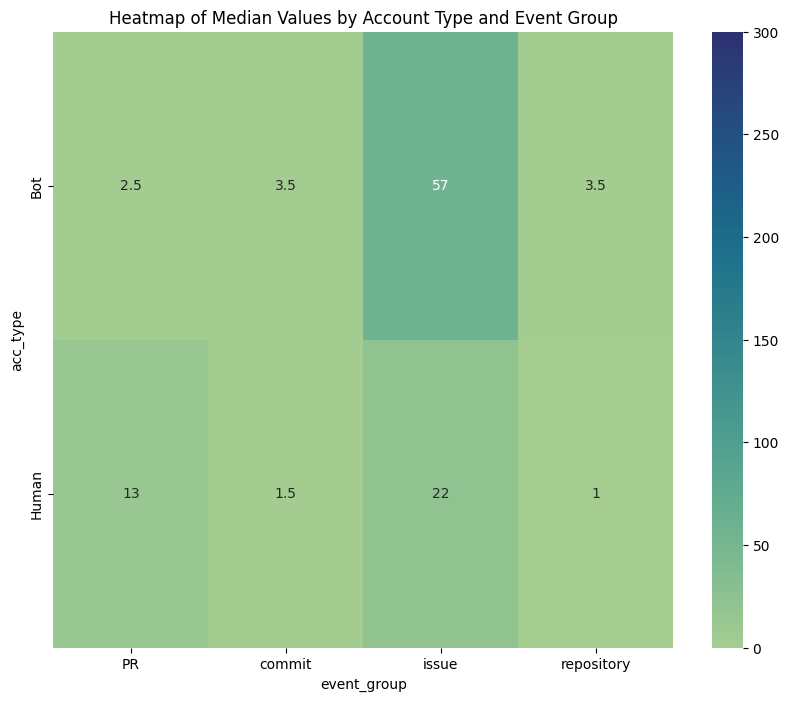

In [25]:
# YOUR CODE BELOW
plt.figure(figsize=(10, 8))  # Taille de la figure (ajuster si nécessaire)
sns.heatmap(df_pivot, annot=True, vmin=0, vmax=300, cmap="crest")

# Titre et affichage de la heatmap
plt.title('Heatmap of Median Values by Account Type and Event Group')
plt.show()

#### What is the difference that you observe between Bots+Bot actors and Humans?

In [29]:
# For PR Event : Humans are significantly more involved in Pull Request (PR) events than Bots+Bot actors
# For Commit Event : Bots+Bot actors perform more commit events than humans
# For Issue Event : Bots+Bot actors perform significantly more Issue events than Humans
# For Repository Event : Bots perform more repository-related events (like creating, deleting repositories) than humans

#### What is the differnce that you observe between Event groups?

In [31]:
# PR Event : The median number of events for PR events is quite higher for humans compared to bots. 
#               Humans are more actively engaged in pull requests than bots.

# Commit Event : Bots perform more commit events than humans. 
#               This suggests that bots might be performing more automated tasks like merging or automating commits.

# Issue Event : The median number of Issue events for Bots is significantly higher than for Humans.
#               Bots appear to be much more involved in issue-related activities.

# Repository Event : Bots are also more involved in repository events compared to humans, 
#               indicating bots are perhaps handling repository management tasks like creating, 
#               deleting, or archiving repositories.

#### What is the difference that you observe between Bots+Bot actors and Humans and Event groups all considering at the same time?

In [32]:
# Bots+Bot actors tend to perform a larger number of issue-related events, 
#       whereas Humans perform significantly fewer issue events. 
#       This could suggest that bots are more often assigned to handle tasks like 
#       automating issue management (e.g., creating issues, labeling, or commenting on issues).


# Humans tend to perform more Pull Request (PR) events compared to bots, 
#       showing that humans are more involved in reviewing, commenting on, or creating pull requests, 
#       which typically requires more judgment and decision-making.


# Commit Events show a reversal, with Bots+Bot Actors performing more commit-related events compared to humans. 
#       Bots might be handling automated commits or other tasks related to code changes, 
#       whereas humans perform fewer of these tasks, likely focusing on manual code writing and review.


# Repository Events also show a higher median value for Bots+Bot Actors compared to Humans. 
#       This may indicate that bots are more often responsible for tasks like repository creation, 
#       archiving, or deleting, which are routine tasks that don't necessarily require human intervention.

### Question 3

#### Create boxen plots to visualise the distribution of number of events in each event group. 
#### For more information you can visit - https://seaborn.pydata.org/generated/seaborn.boxenplot.html#seaborn.boxenplot 
#### You should highlight the data points that correspond to bots using a stripplot in seaborn. https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial  
#### Interpret the results of the visualisation.

C:\Users\Aymeline\AppData\Local\Temp\ipykernel_70888\691303927.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='acc_type', y='PR', data=pull_requests_df, palette="Set2")


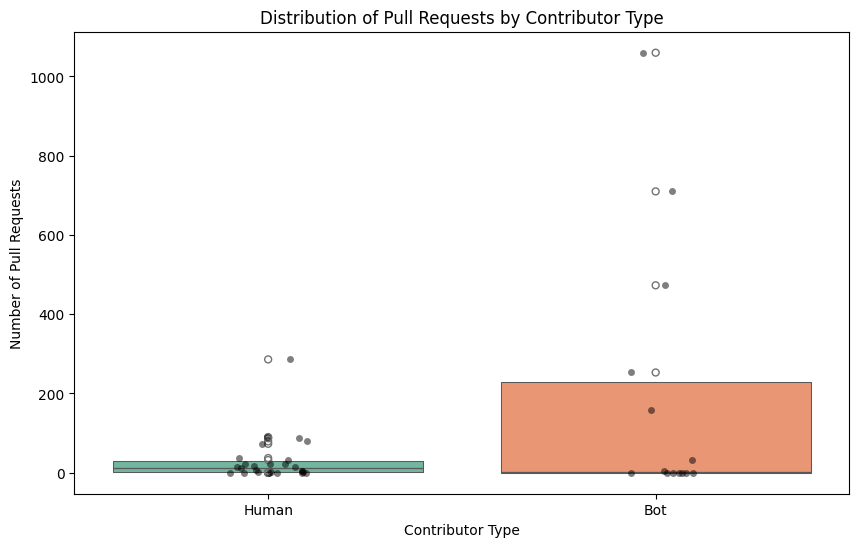

In [34]:
# YOUR CODE BELOW - Visualize number of events from pull request event group
pull_requests_df = final_df[['acc_type', 'PR']]

plt.figure(figsize=(10, 6))
sns.boxenplot(x='acc_type', y='PR', data=pull_requests_df, palette="Set2")

sns.stripplot(x='acc_type', y='PR', data=pull_requests_df, jitter=True, color='black', alpha=0.5)

plt.title('Distribution of Pull Requests by Contributor Type')
plt.xlabel('Contributor Type')
plt.ylabel('Number of Pull Requests')

plt.show()

C:\Users\Aymeline\AppData\Local\Temp\ipykernel_70888\3832791593.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='acc_type', y='issue', data=pull_requests_df, palette="Set2")


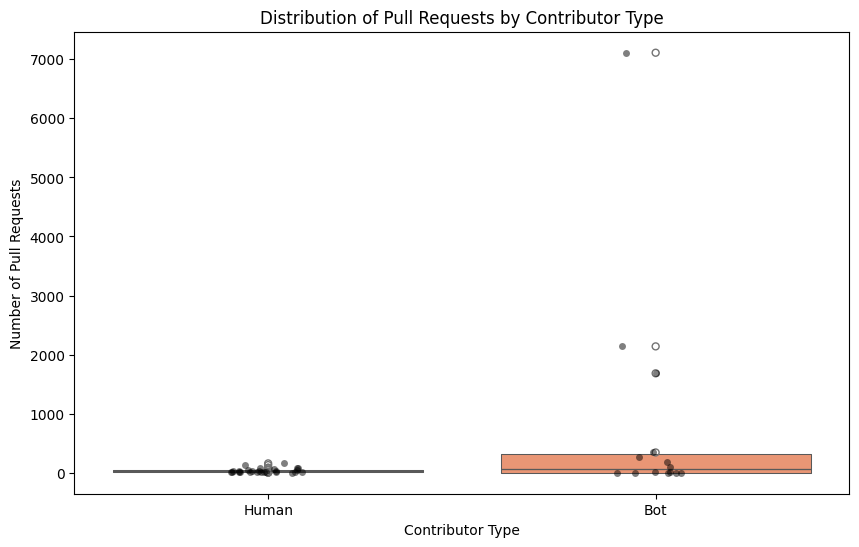

In [35]:
# YOUR CODE BELOW - Visualise number of events from issue event group
pull_requests_df = final_df[['acc_type', 'issue']]

plt.figure(figsize=(10, 6))
sns.boxenplot(x='acc_type', y='issue', data=pull_requests_df, palette="Set2")

sns.stripplot(x='acc_type', y='issue', data=pull_requests_df, jitter=True, color='black', alpha=0.5)

plt.title('Distribution of Pull Requests by Contributor Type')
plt.xlabel('Contributor Type')
plt.ylabel('Number of Pull Requests')

plt.show()

C:\Users\Aymeline\AppData\Local\Temp\ipykernel_70888\4275659535.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='acc_type', y='commit', data=pull_requests_df, palette="Set2")


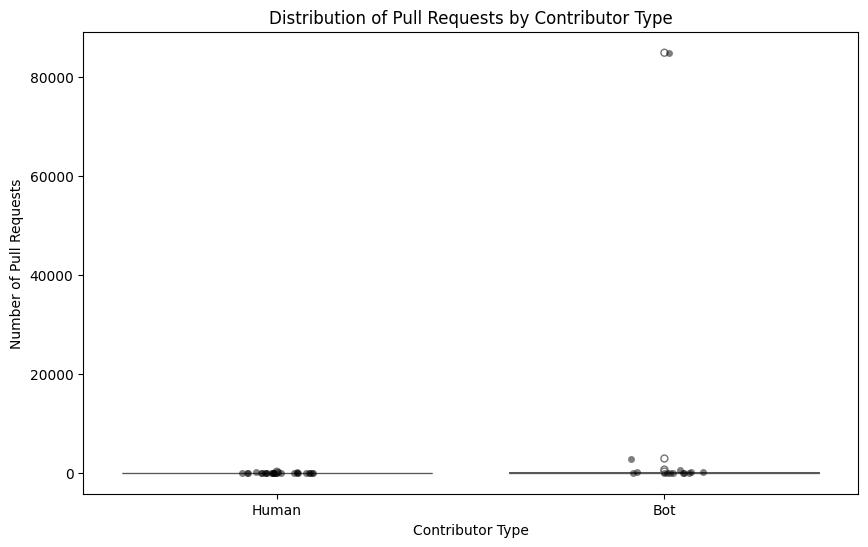

In [36]:
# YOUR CODE BELOW - Visualise number of events from commit event group
pull_requests_df = final_df[['acc_type', 'commit']]

plt.figure(figsize=(10, 6))
sns.boxenplot(x='acc_type', y='commit', data=pull_requests_df, palette="Set2")

sns.stripplot(x='acc_type', y='commit', data=pull_requests_df, jitter=True, color='black', alpha=0.5)

plt.title('Distribution of Pull Requests by Contributor Type')
plt.xlabel('Contributor Type')
plt.ylabel('Number of Pull Requests')

plt.show()

C:\Users\Aymeline\AppData\Local\Temp\ipykernel_70888\4012433410.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='acc_type', y='repository', data=pull_requests_df, palette="Set2")


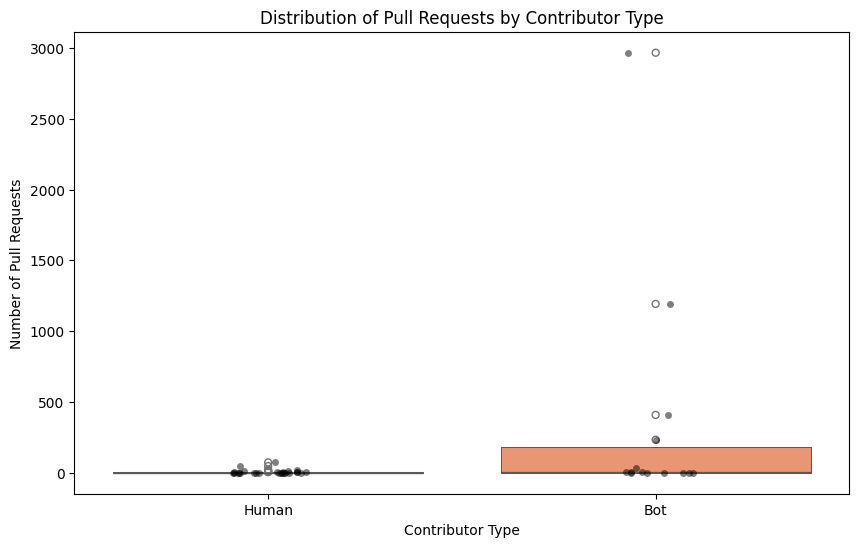

In [37]:
# YOUR CODE BELOW - Visualise number of events from repo event group
pull_requests_df = final_df[['acc_type', 'repository']]

plt.figure(figsize=(10, 6))
sns.boxenplot(x='acc_type', y='repository', data=pull_requests_df, palette="Set2")

sns.stripplot(x='acc_type', y='repository', data=pull_requests_df, jitter=True, color='black', alpha=0.5)

plt.title('Distribution of Pull Requests by Contributor Type')
plt.xlabel('Contributor Type')
plt.ylabel('Number of Pull Requests')

plt.show()

### Question 4.1

#### Statistical identify whether number of events in each event group is normally distributed or not.
#### Null hypothesis - $H_0$: Sample comes from the data that has normal distribution.
#### Use Shapiro-Wilk test for this purpose. Use the p-value with a threshold of 0.05 to determine whether $H_0$ can be rejected with statistical significance or not. 

#### Use shapiro from scipy.stats to perform this test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

In [39]:
# YOUR CODE BELOW
event_groups = ['PR', 'commit', 'issue', 'repository']

for event_group in event_groups:

    event_data = final_df[event_group]
    
    stat, p_value = shapiro(event_data)
    
    print(f"Event Group: {event_group}")
    print(f"Shapiro-Wilk Test Statistic: {stat}")
    print(f"p-value: {p_value}")
    
    if p_value < 0.05:
        print(f"Reject H0: The distribution of {event_group} is not normal.")
    else:
        print(f"Fail to reject H0: The distribution of {event_group} is normal.")
    print("-" * 50)

Event Group: PR
Shapiro-Wilk Test Statistic: 0.47330411270537487
p-value: 8.359898504179859e-11
Reject H0: The distribution of PR is not normal.
--------------------------------------------------
Event Group: commit
Shapiro-Wilk Test Statistic: 0.1576851026893733
p-value: 8.101365301863112e-14
Reject H0: The distribution of commit is not normal.
--------------------------------------------------
Event Group: issue
Shapiro-Wilk Test Statistic: 0.28655190405146513
p-value: 1.0516158330936726e-12
Reject H0: The distribution of issue is not normal.
--------------------------------------------------
Event Group: repository
Shapiro-Wilk Test Statistic: 0.2748082565274311
p-value: 8.216761536850527e-13
Reject H0: The distribution of repository is not normal.
--------------------------------------------------


### Question 4.2
#### Determine if there is any statistical diﬀerence in number of events between the identified event groups. Perform this test on all pairs of event groups. 
#### Null hypothesis - $H_0$: Any two event group come from the same population.
#### If $H_0$ is rejected in Shapiro-Wilk test (at least for one of the two event groups considered for test), use the Mann-Whitney U statistical test for this purpose. If $H_0$ is not rejected in Shapiro-Wilk test, use the independent t-test for this purpose.  
#### In any case, use the p-value with a threshold of 0.01 to determine whether $H_0$ can be rejected with statistical significance. 

#### Use mannwhitneyu from scipy.stats to perform Mann-Whitney U test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html) 
#### or 
#### ttest_ind from scipy.stats to perform independent t-test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html.

#### More information:

You can pass the following arguments to mannwhitneyu from scipy.stats - (method='exact', nan_policy='omit'). For ttest_ind you can use - (nan_policy='omit')

In [40]:
# YOUR CODE BELOW

for i in range(len(event_groups)):
    for j in range(i + 1, len(event_groups)):
        group1 = event_groups[i]
        group2 = event_groups[j]
        
        data1 = final_df[group1]
        data2 = final_df[group2]
        
        stat1, p_value1 = shapiro(data1)
        stat2, p_value2 = shapiro(data2)
        
        print(f"Comparing {group1} and {group2}:")
        print(f"Shapiro-Wilk Test for {group1}: p-value = {p_value1}")
        print(f"Shapiro-Wilk Test for {group2}: p-value = {p_value2}")
        
        if p_value1 < 0.05 or p_value2 < 0.05:
            print("Using Mann-Whitney U test (non-normal distribution)")
            stat, p_value = mannwhitneyu(data1, data2)
        else:
            print("Using Independent t-test (normal distribution)")
            stat, p_value = ttest_ind(data1, data2)
        
        print(f"Test statistic: {stat}")
        print(f"p-value: {p_value}")
        
        if p_value < 0.01:
            print(f"Reject H0: There is a significant difference between {group1} and {group2}.")
        else:
            print(f"Fail to reject H0: No significant difference between {group1} and {group2}.")
        
        print("-" * 50)

Comparing PR and commit:
Shapiro-Wilk Test for PR: p-value = 8.359898504179859e-11
Shapiro-Wilk Test for commit: p-value = 8.101365301863112e-14
Using Mann-Whitney U test (non-normal distribution)
Test statistic: 901.0
p-value: 0.3174773147359443
Fail to reject H0: No significant difference between PR and commit.
--------------------------------------------------
Comparing PR and issue:
Shapiro-Wilk Test for PR: p-value = 8.359898504179859e-11
Shapiro-Wilk Test for issue: p-value = 1.0516158330936726e-12
Using Mann-Whitney U test (non-normal distribution)
Test statistic: 612.0
p-value: 0.06927999597574509
Fail to reject H0: No significant difference between PR and issue.
--------------------------------------------------
Comparing PR and repository:
Shapiro-Wilk Test for PR: p-value = 8.359898504179859e-11
Shapiro-Wilk Test for repository: p-value = 8.216761536850527e-13
Using Mann-Whitney U test (non-normal distribution)
Test statistic: 968.0
p-value: 0.09924949042069456
Fail to rejec

### Question 4.3
#### Each time you reject the null hypothesis $H_0$, quantify the effect size of the diﬀerence between the groups using cliﬀ’s delta ($\delta$). 
#### To calculate cliﬀ’s delta, you can pass the list of values to cliﬀ delta.py file given in the repository. E.g., cliffsDelta.cliffsDelta(list of values, list of values). This will return the effect size.
#### Refer to the table given in the TP document and mention your interpretation (negligible, small, medium, large).

In [42]:
# YOU CODE BELOW
for i in range(len(event_groups)):
    for j in range(i + 1, len(event_groups)):
        group1 = event_groups[i]
        group2 = event_groups[j]
        
        data1 = final_df[group1]
        data2 = final_df[group2]
        
        stat1, p_value1 = shapiro(data1)
        stat2, p_value2 = shapiro(data2)
        
        print(f"Comparing {group1} and {group2}:")
        print(f"Shapiro-Wilk Test for {group1}: p-value = {p_value1}")
        print(f"Shapiro-Wilk Test for {group2}: p-value = {p_value2}")
        
        if p_value1 < 0.05 or p_value2 < 0.05:
            print("Using Mann-Whitney U test (non-normal distribution)")
            stat, p_value = mannwhitneyu(data1, data2)
        else:
            print("Using Independent t-test (normal distribution)")
            stat, p_value = ttest_ind(data1, data2)
        
        print(f"Test statistic: {stat}")
        print(f"p-value: {p_value}")

        if p_value < 0.01:
            print(f"Reject H0: There is a significant difference between {group1} and {group2}.")
            
            effect_size = cd.cliffsDelta(data1.tolist(), data2.tolist())
            print(f"Cliff's Delta (Effect Size) for {group1} vs {group2}: {effect_size}")
            
            if abs(effect_size) < 0.147:
                print("Effect size: Negligible")
            elif 0.147 <= abs(effect_size) < 0.33:
                print("Effect size: Small")
            elif 0.33 <= abs(effect_size) < 0.474:
                print("Effect size: Medium")
            else:
                print("Effect size: Large")
        else:
            print(f"Fail to reject H0: No significant difference between {group1} and {group2}.")
        
        print("-" * 50)

Comparing PR and commit:
Shapiro-Wilk Test for PR: p-value = 8.359898504179859e-11
Shapiro-Wilk Test for commit: p-value = 8.101365301863112e-14
Using Mann-Whitney U test (non-normal distribution)
Test statistic: 901.0
p-value: 0.3174773147359443
Fail to reject H0: No significant difference between PR and commit.
--------------------------------------------------
Comparing PR and issue:
Shapiro-Wilk Test for PR: p-value = 8.359898504179859e-11
Shapiro-Wilk Test for issue: p-value = 1.0516158330936726e-12
Using Mann-Whitney U test (non-normal distribution)
Test statistic: 612.0
p-value: 0.06927999597574509
Fail to reject H0: No significant difference between PR and issue.
--------------------------------------------------
Comparing PR and repository:
Shapiro-Wilk Test for PR: p-value = 8.359898504179859e-11
Shapiro-Wilk Test for repository: p-value = 8.216761536850527e-13
Using Mann-Whitney U test (non-normal distribution)
Test statistic: 968.0
p-value: 0.09924949042069456
Fail to rejec